# Exploratory Data Analysis

The purpose of this notebook is to visually analyse prepared data and draw conclusions.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd

# let matplotlib plots be part of Jupyter Notebook
%matplotlib inline

# set up higher resolution for matplotlib plots
%config InlineBackend.figure_format = 'retina'

## Connect to Azure Machine Learning Service workspace

In [2]:
import azureml.core
from azureml.core import Workspace

ws = Workspace.from_config(path="../src_aml")

## Download latest dataset 

In [3]:
from azureml.core import Experiment

experiment = Experiment(ws, "Data_Preparation_Pipeline")

latest_completed_run = None
for run in experiment.get_runs():
    if run.get_status() == "Finished":
        latest_completed_run = run
        break

In [4]:
data_filename = "cleaning_output_pipeline_data"
download_location_base = os.path.join("..", "data", "interim", "after_cleaning")

In [5]:
# Retrieve the last step
last_step = latest_completed_run.find_step_run(name="Data cleaning")
if last_step:
    last_step_obj = last_step[0] # since we have only one step with the name
    # download output from the last step
    last_step_obj.get_output_data(data_filename).download(download_location_base, overwrite=True)

## Load data

In [6]:
# set path to downloaded data
filepath = os.path.join(download_location_base, "azureml", last_step[0].id, data_filename)

In [7]:
# load data
df = pd.read_csv(filepath)
df = df.set_index('Timestamp')

## Quick verification of datasets

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13918 entries, 2019-10-25 15:20:00 to 2020-02-01 18:00:00
Columns: 204 entries, 15001 to 15254
dtypes: float64(204)
memory usage: 21.8+ MB


In [9]:
df.head()

,15001,15002,15003,15004,15005,15006,15007,15008,15009,15010,...,15195,15196,15197,15198,15199,15200,15251,15252,15253,15254
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-10-25 15:20:00,3.0,11.0,3.0,37.0,1.0,5.0,1.0,9.0,6.0,2.0,...,1.0,1.0,2.0,2.0,5.0,2.0,5.0,4.0,3.0,0.0
2019-10-25 15:30:00,4.0,3.0,3.0,37.0,1.0,3.0,2.0,9.0,4.0,2.0,...,2.0,0.0,1.0,3.0,5.0,1.0,6.0,5.0,2.0,0.0
2019-10-25 15:40:00,5.0,3.0,1.0,36.0,1.0,2.0,2.0,7.0,3.0,2.0,...,2.0,0.0,3.0,3.0,4.0,1.0,5.0,5.0,2.0,0.0
2019-10-25 15:50:00,4.0,5.0,1.0,39.0,1.0,1.0,2.0,7.0,3.0,2.0,...,4.0,0.0,3.0,4.0,3.0,1.0,2.0,5.0,2.0,0.0
2019-10-25 16:00:00,4.0,8.0,5.0,40.0,2.0,1.0,2.0,7.0,2.0,1.0,...,4.0,0.0,2.0,3.0,3.0,1.0,3.0,6.0,2.0,0.0


In [10]:
df.tail()

,15001,15002,15003,15004,15005,15006,15007,15008,15009,15010,...,15195,15196,15197,15198,15199,15200,15251,15252,15253,15254
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-01 17:20:00,4.0,3.0,7.0,3.0,4.0,0.0,6.0,0.0,1.0,1.0,...,0.0,1.0,4.0,2.0,0.0,3.0,4.0,4.0,0.0,3.0
2020-02-01 17:30:00,3.0,3.0,7.0,3.0,3.0,0.0,7.0,0.0,1.0,1.0,...,0.0,1.0,3.0,2.0,0.0,3.0,4.0,4.0,0.0,3.0
2020-02-01 17:40:00,4.0,1.0,6.0,2.0,3.0,0.0,7.0,0.0,1.0,1.0,...,0.0,1.0,3.0,2.0,0.0,3.0,4.0,4.0,0.0,3.0
2020-02-01 17:50:00,4.0,1.0,6.0,2.0,3.0,0.0,7.0,0.0,1.0,1.0,...,0.0,1.0,3.0,2.0,0.0,3.0,4.0,4.0,0.0,3.0
2020-02-01 18:00:00,4.0,1.0,6.0,2.0,3.0,0.0,7.0,0.0,1.0,1.0,...,0.0,1.0,3.0,2.0,0.0,2.0,3.0,3.0,0.0,3.0


## Visual inspection

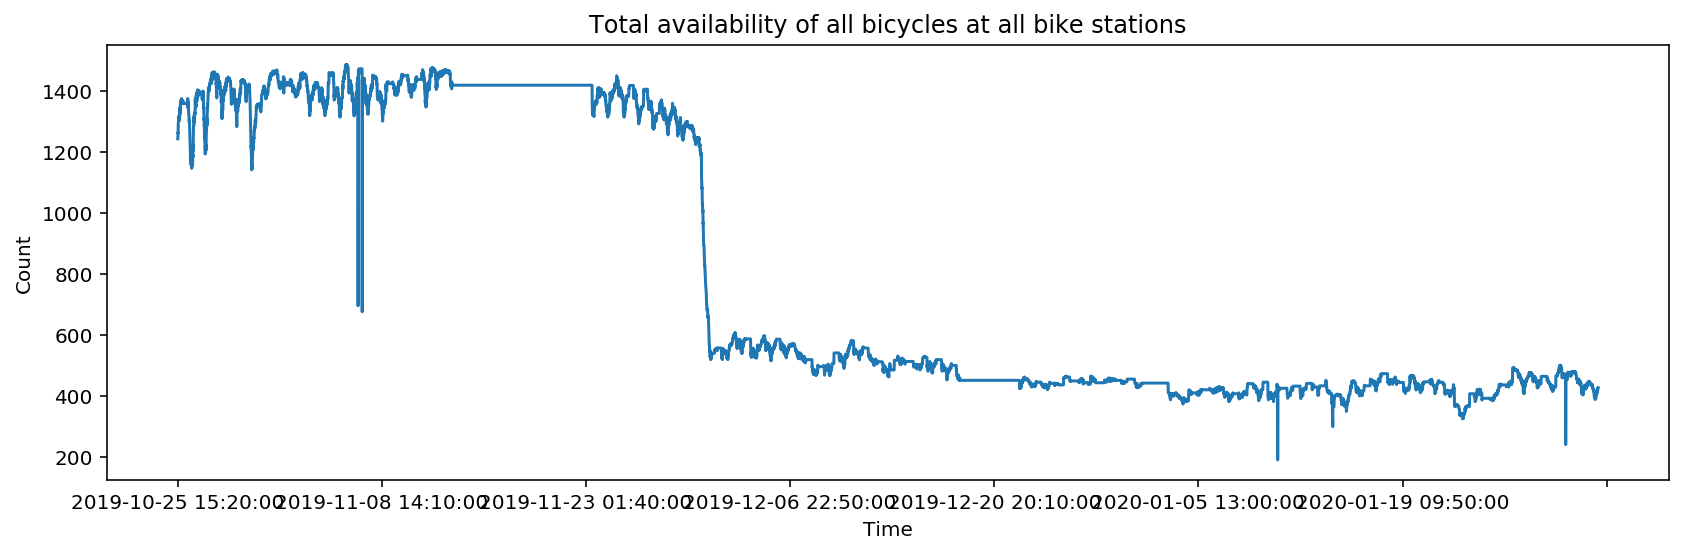

In [11]:
ax = df.sum(axis=1).plot(figsize=(14,4))
ax.set_title('Total availability of all bicycles at all bike stations')
ax.set_xlabel('Time')
ax.set_ylabel('Count');

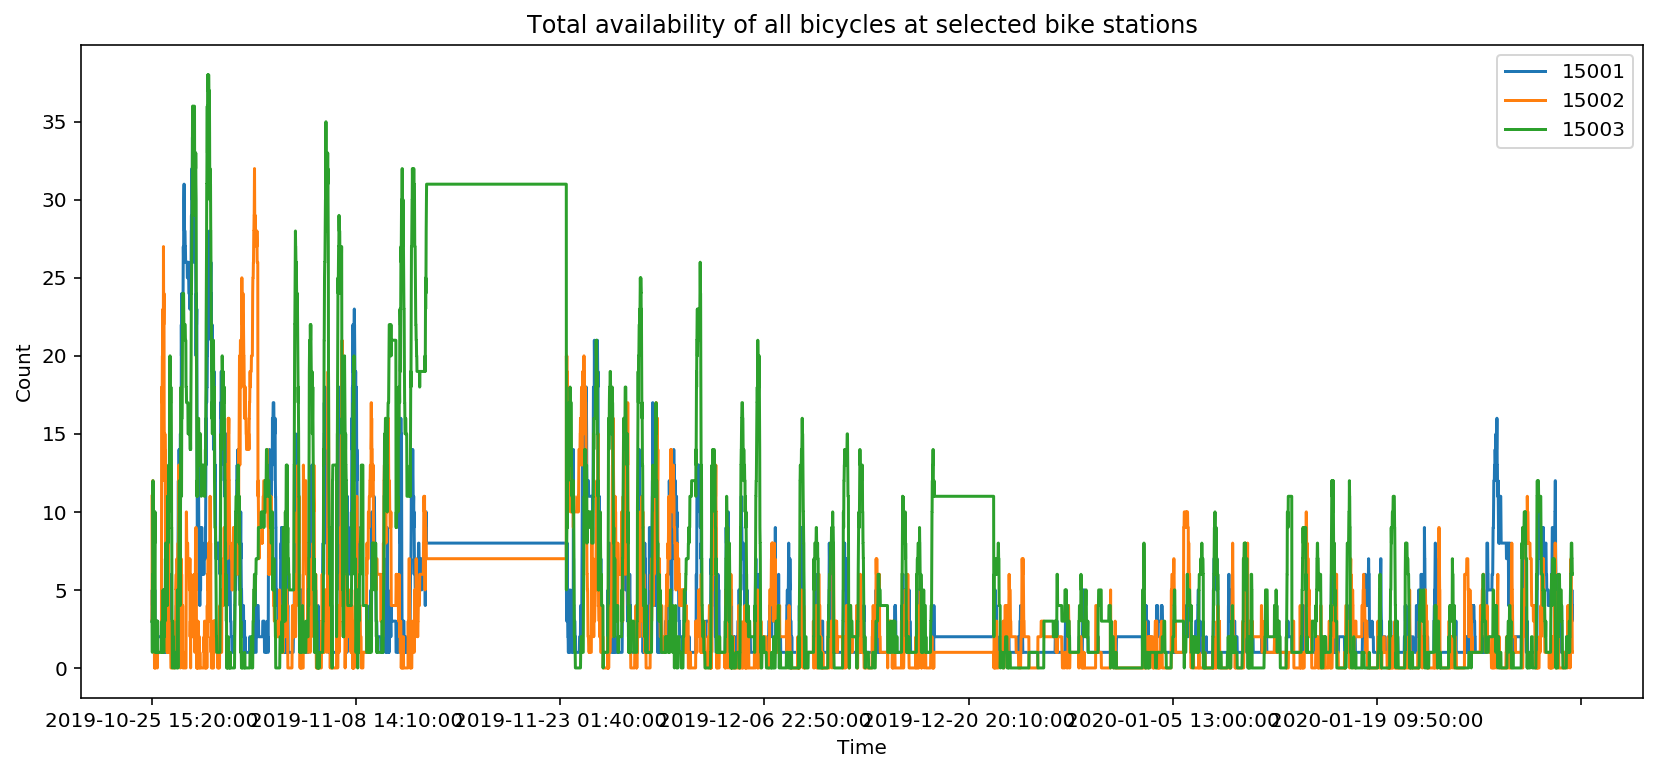

In [12]:
ax = df[['15001', '15002', '15003']].plot(figsize=(14,6))
ax.set_title('Total availability of all bicycles at selected bike stations')
ax.set_xlabel('Time')
ax.set_ylabel('Count');